Using Pandas and Numpy with Data
--

First, we'll need to import the libraries.

In [1]:
import pandas as pd
import numpy as np

This is an example of how to read a table from Wikipedia, harvest some data, and change it around so that it reads well for NumPy and Pandas.

This first entry describes the `.read_html()` function from the Pandas library.

In [2]:
# pd.read_html?

In [3]:
episodes = pd.read_html(r'https://en.wikipedia.org/wiki/Parks_and_Recreation_%28season_4%29',header=0)
episodes

[         Parks and Recreation (season 4)  \
 0                 Region 1 DVD cover art   
 1                               Starring   
 2                      Country of origin   
 3                        No. of episodes   
 4                                Release   
 5                       Original network   
 6                       Original release   
 7                      Season chronology   
 8       ← PreviousSeason 3Next →Season 5   
 9  List of Parks and Recreation episodes   
 
                    Parks and Recreation (season 4).1  
 0                             Region 1 DVD cover art  
 1  Amy Poehler Rashida Jones Aziz Ansari Nick Off...  
 2                                      United States  
 3                                                 22  
 4                                            Release  
 5                                                NBC  
 6                      September 22, 2011May 8, 2012  
 7                                  Season chronology  

Above, we've passed two arguments to the pd.read_html() method. First, we're passing the URL. Pandas will use other installed libraries to connect to this URL and begin extracting the tables as a list. We're also specifying that the first row (0) is where the header information is.

In the resulting text, notice the '[' at the beginning, and the ']' all the way at the end? That should be an indication that it is a list.  Of course you could always:

In [4]:
type(episodes)

list

Since it is a list, it can be sliced. We just need to figure out which slice we want. Is it the first one? (remember, Python is zero-indexed.)

In [5]:
episodes[0]

,Parks and Recreation (season 4),Parks and Recreation (season 4).1
0,Region 1 DVD cover art,Region 1 DVD cover art
1,Starring,Amy Poehler Rashida Jones Aziz Ansari Nick Off...
2,Country of origin,United States
3,No. of episodes,22
4,Release,Release
5,Original network,NBC
6,Original release,"September 22, 2011May 8, 2012"
7,Season chronology,Season chronology
8,← PreviousSeason 3Next →Season 5,← PreviousSeason 3Next →Season 5
9,List of Parks and Recreation episodes,List of Parks and Recreation episodes


While we could do some things with this, this table isn't the full data we're looking to process. For this page, we're looking at the second table, or `episodes[1]`. We'll go ahead and assign that to a variable we're calling 'season'.

In [6]:
season = episodes[1]
season

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Unnamed: 7
0,47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19],NaN
1,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...
2,48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20],NaN
3,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...
4,49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21],NaN
5,"Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,..."
6,50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22],NaN
7,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...
8,51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23],NaN
9,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...


Notice here that there are a bunch of cells with 'NaN' in them. We talked about 'Not a Number' before, and again NumPy is saying that it couldn't find or interpret data here. We could use some Pandas functions to deal with these cells.

In [7]:
season.dropna()

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Unnamed: 7
1,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...
3,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...
5,"Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,..."
7,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...
9,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...
11,"A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ..."
13,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...
15,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...
17,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...
19,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie fr

The .dropna() method effectively drops any rows where there are one or more NaN entries. Unfortunately, while there were rows that contained NaN, there were still some cells in those rows with data in them. By default, .dropna() has the argument **how='any'**. Meaning, if a row contains one or more NaN, then .dropna() will drop it. Instead, we can use .dropna(how='all'). This will only drop rows where all cells are NaN.

In [8]:
season.dropna(how='all')

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Unnamed: 7
0,47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19],NaN
1,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...
2,48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20],NaN
3,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...
4,49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21],NaN
5,"Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,..."
6,50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22],NaN
7,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...
8,51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23],NaN
9,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...


This doesn't show anything here, as we don't have any rows that are completely filled with NaN. But, we can use .fillna() to automatically change that value to something else that may be relevant to your data collection methods.

In [9]:
season.fillna(-999)

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Unnamed: 7
0,47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19],-999
1,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...
2,48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20],-999
3,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...
4,49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21],-999
5,"Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,..."
6,50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22],-999
7,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...
8,51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23],-999
9,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...


.fillna() has multiple methods, like forward fill, backward fill, interpolation.

In [10]:
# season.fillna?

In [11]:
season.fillna(method='bfill')

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Unnamed: 7
0,47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19],Leslie is torn between Ben and her dreams of r...
1,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...
2,48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20],Leslie is pulled into Ron's personal life as T...
3,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...
4,49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21],"Promoting a book she has written about Pawnee,..."
5,"Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,..."
6,50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22],Ron and Leslie get into a feud over their riva...
7,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...
8,51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23],Ben is mad when Andy and April decide to throw...
9,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...


while .fillna() is useful, the information contained in surrounding cells isn't that useful to us. It appears that in the case of this table, the first row (row 0) and each alternating row has information about the episode, and the second row (row 1) and each alternating row has the episode description of the previous episode. How do we deal with that? Slices, of course!

In [12]:
season[1::2]

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Unnamed: 7
1,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...,Leslie is torn between Ben and her dreams of r...
3,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...,Leslie is pulled into Ron's personal life as T...
5,"Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,...","Promoting a book she has written about Pawnee,..."
7,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...,Ron and Leslie get into a feud over their riva...
9,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...,Ben is mad when Andy and April decide to throw...
11,"A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ...","A local Pawnee group, The Reasonabilists (aka ..."
13,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...,Leslie and Ben are excited about the opportuni...
15,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...,Leslie attempts to delay completion of Indiana...
17,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...,Leslie and Ben finally tell Chris about their ...
19,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie from trying...,When Chris bans a suspended Leslie fr

These slices will get us the descriptions alone, but we repeating the content over a bunch of cells, and it's extraneous. Let's drop those using the indexers.

In [13]:
season[1::2].iloc[:,0]

1     Leslie is torn between Ben and her dreams of r...
3     Leslie is pulled into Ron's personal life as T...
5     Promoting a book she has written about Pawnee,...
7     Ron and Leslie get into a feud over their riva...
9     Ben is mad when Andy and April decide to throw...
11    A local Pawnee group, The Reasonabilists (aka ...
13    Leslie and Ben are excited about the opportuni...
15    Leslie attempts to delay completion of Indiana...
17    Leslie and Ben finally tell Chris about their ...
19    When Chris bans a suspended Leslie from trying...
21    Leslie must ask for help in order to stage a m...
23    The race for City Council is shaken up by the ...
25    Leslie and Ben host a bowling night after rece...
27    Leslie works to find Ann a Valentine's date, f...
29    Leslie and Ben run into Dave (Louis C.K.) whil...
31    After realizing everyone forgot Jerry's birthd...
33    Bobby Newport hires a new campaign manager (Ka...
35    Indianapolis journalist Buddy Wood (Sean H

Pandas really wants to maintain the indices, which is usually really helpful - it helps prevent data mismatches down the road. But, what if we really want to ignore the index? We can reset it.

In [14]:
season[1::2].iloc[:,0].reset_index()

,index,No.overall
0,1,Leslie is torn between Ben and her dreams of r...
1,3,Leslie is pulled into Ron's personal life as T...
2,5,"Promoting a book she has written about Pawnee,..."
3,7,Ron and Leslie get into a feud over their riva...
4,9,Ben is mad when Andy and April decide to throw...
5,11,"A local Pawnee group, The Reasonabilists (aka ..."
6,13,Leslie and Ben are excited about the opportuni...
7,15,Leslie attempts to delay completion of Indiana...
8,17,Leslie and Ben finally tell Chris about their ...
9,19,When Chris bans a suspended Leslie from trying...


Here we have created a new index, but Pandas (trying to save us from ourselves) has kept the index values from before, but in a separate Series within the new DataFrame. All we have to do now is drop it. While we're at it, let's go ahead and create an episode description variable and set it equal to this new series.

In [15]:
episode_desc = season[1::2].iloc[:,0].reset_index().drop('index',axis=1)
episode_desc

,No.overall
0,Leslie is torn between Ben and her dreams of r...
1,Leslie is pulled into Ron's personal life as T...
2,"Promoting a book she has written about Pawnee,..."
3,Ron and Leslie get into a feud over their riva...
4,Ben is mad when Andy and April decide to throw...
5,"A local Pawnee group, The Reasonabilists (aka ..."
6,Leslie and Ben are excited about the opportuni...
7,Leslie attempts to delay completion of Indiana...
8,Leslie and Ben finally tell Chris about their ...
9,When Chris bans a suspended Leslie from trying...


The column name (No. Overall) doesn't make any sense, so we'll use the `.rename()` method to rename the columns using a dictionary with a single key-value pair.

In [16]:
episode_desc = episode_desc.rename(columns = {'No.overall':'Description'})
episode_desc

,Description
0,Leslie is torn between Ben and her dreams of r...
1,Leslie is pulled into Ron's personal life as T...
2,"Promoting a book she has written about Pawnee,..."
3,Ron and Leslie get into a feud over their riva...
4,Ben is mad when Andy and April decide to throw...
5,"A local Pawnee group, The Reasonabilists (aka ..."
6,Leslie and Ben are excited about the opportuni...
7,Leslie attempts to delay completion of Indiana...
8,Leslie and Ben finally tell Chris about their ...
9,When Chris bans a suspended Leslie from trying...


For the other cells in the season dataframe, we want to start at the first row (row 0) and alternate getting all of the ones with the data. Since the procedure will be almost exactly the same as before, we'll skip ahead to the final part. We'll also drop any columns that don't contribute much.

In [17]:
episode_data = season[0::2].reset_index().drop('index',axis=1)
episode_data = episode_data.drop('Unnamed: 7',axis=1)
episode_data

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions)
0,47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19]
1,48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20]
2,49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21]
3,50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22]
4,51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23]
5,52,6,"""End of the World""†",Dean Holland,Michael Schur,"November 3, 2011",4.00[24]
6,53,7,"""The Treaty""",Jorma Taccone,Harris Wittels,"November 10, 2011",3.66[25]
7,54,8,"""Smallest Park""",Nicole Holofcener,Chelsea Peretti,"November 17, 2011",3.68[26]
8,55,9,"""The Trial of Leslie Knope""",Dean Holland,Dan Goor & Michael Schur,"December 1, 2011",3.69[27]
9,56,10,"""Citizen Knope""",Randall Einhorn,Dave King,"December 8, 2011",3.64[28]


Now we have a list of data and a list of descriptions. By wonderful coincidence (not really), they both have the same number of cells. Let's check to be certain.

aside: programming languages are funny about the equals sign '='. A lot of times, we want to see if something is equal to something else. Python assumes that a single equals means that you are **making a thing equal to some other thing**.

If you want to check to see if two entities *are equal* then you will use the double equal '=='

single = 'is'

`age = 5`

age _is_ 5

double == 'is it'

`age == 5`

age, _is it_ 5?

this is a largely semantic discussion, but you would be surprised how often it causes problems.

In [18]:
len(episode_data) == len(episode_desc)

True

Now, let's concatenate the data DataFrame, and the description Series. Remember to specify axis.

In [19]:
episode_list = pd.concat([episode_data,episode_desc],axis=1)

Checking the column heads just to be certain.

In [20]:
episode_list.columns

Index(['No.overall', 'No. inseason', 'Title', 'Directed by', 'Written by',
       'Original air date', 'U.S. viewers(millions)', 'Description'],
      dtype='object')

Setting the index to one of the unique Series in the DataFrame. 'No. Overall' makes sense.

In [21]:
episode_list = episode_list.set_index('No.overall')

In [22]:
episode_list

,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Description
No.overall,,,,,,,
47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19],Leslie is torn between Ben and her dreams of r...
48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20],Leslie is pulled into Ron's personal life as T...
49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21],"Promoting a book she has written about Pawnee,..."
50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22],Ron and Leslie get into a feud over their riva...
51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23],Ben is mad when Andy and April decide to throw...
52,6,"""End of the World""†",Dean Holland,Michael Schur,"November 3, 2011",4.00[24],"A local Pawnee group, The Reasonabilists (aka ..."
53,7,"""The Treaty""",Jorma Taccone,Harris Wittels,"November 10, 2011",3.66[25],Leslie and Ben are excited about the opportuni...
54,8,"""Smallest Park""",Nicole Holofcener,Chelsea Peretti,"November 17, 2011",3.68[26],Leslie attempts to delay completion of Indiana...
55,9,"""The Trial of Leslie Knope""",Dean Holland,Dan Goor & Michael Schur,"December 1, 2011",3.69[27],Leslie and Ben finally tell Chris about their ...


For the sake of space, the preview here doesn't show all the information, but you can definitely check the contents by using the `.values` property.

In [23]:
episode_list['Description'].values

array(['Leslie is torn between Ben and her dreams of running for public office, while Ron braces himself for the arrival of his first wife, Tammy One.',
       'Leslie is pulled into Ron\'s personal life as Tammy One (Patricia Clarkson) exerts malevolent influence on him, and seeks out help from Ron\'s mother, "Tammy Zero". Tom tasks Ben with helping out with his grossly mismanaged new company, while Ann and Chris team up for a public service announcement about diabetes.',
       'Promoting a book she has written about Pawnee, Leslie falls victim to Joan Callamezzo\'s "Gotcha!" journalism, but also learns a horrifying fact about her personal history. Tom\'s flirting with Joan takes a disturbing turn, while Ann strives fruitlessly to make Ron and April enjoy chatting with her.',
       'Ron and Leslie get into a feud over their rival youth camp programs, with Ron\'s spartan Pawnee Rangers up against Leslie\'s supportive and indulgent Pawnee Goddesses. Tom and Donna invite Ben – still de

In [24]:
type(episode_list['Description'])

pandas.core.series.Series

In [25]:
type(episode_list)

pandas.core.frame.DataFrame

Indexers can be used like slices. They have the brackets and colons, but they can also be used in conjunction with commas to indicate two dimensions. In the first example, we use our knowledge of slices on a DataFrame to separate content out in two different ways. We're also using the NumPy `.all()` method to verify that the two sections are equivalent. We can also check the number of entries by using the `.len()` method.

In [26]:
print(np.all(season[1::2].iloc[:,0] == season.iloc[1::2,0]))
print(len(season[1::2].iloc[:,0]))
print(len(season.iloc[1::2,0]))

True
22
22


Be careful when mixing integers with strings for `.loc[]` and `.iloc[]`. Since they both return dataframes (try `type()`) you can always nest the functions if needed. Also, if you need non-contiguous ranges, you can use tuples. We haven't talked much about tuples, but they're basically lists that are _immutable_ to a degree. We won't go too far down this road. Basically, if it looks like a list, but it's surrounded by parentheses, it's a tuple.

In [27]:
print(type(episode_list))
print(type(episode_list.iloc[2:4,1:5]))
print(type(episode_list.iloc[2:5].loc[:,('Title','Written by')]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [28]:
# episode_list.iloc[2:4,1:5]
# episode_list.iloc[2:5].loc[:,('Title','Written by')]

In fact, all of these are functionally equivalent:

In [29]:
# .loc uses strings to locate cells
episode_list.loc[:,'Title']

# .iloc uses integers to locate cells
episode_list.iloc[:,1] 

# .ix uses strings first, but can use integers if none are available.
# It's deprecated, so don't expect it to be here long.
#episode_list.ix[:,'Title']

#episode_list.ix[:,1]

# alternatively, you can refer to the specific column head
episode_list['Title']

# or use dot notation (if there are no spaces in the column head).
episode_list.Title

No.overall
47             "I'm Leslie Knope"
48               "Ron and Tammys"
49                "Born & Raised"
50               "Pawnee Rangers"
51                 "Meet n Greet"
52            "End of the World"†
53                   "The Treaty"
54                "Smallest Park"
55    "The Trial of Leslie Knope"
56                "Citizen Knope"
57             "The Comeback Kid"
58                  "Campaign Ad"
59            "Bowling for Votes"
60                "Operation Ann"
61                 "Dave Returns"
62                "Sweet Sixteen"
63            "Campaign Shake-Up"
64                        "Lucky"
65                    "Live Ammo"
66                  "The Debate"†
67                    "Bus Tour"†
68          "Win, Lose, or Draw"†
Name: Title, dtype: object

In [30]:
np.all(episode_list.loc[:,'Title'] == episode_list.iloc[:,1])

True

In [31]:
episode_list

,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Description
No.overall,,,,,,,
47,1,"""I'm Leslie Knope""",Troy Miller,Dan Goor,"September 22, 2011",4.11[19],Leslie is torn between Ben and her dreams of r...
48,2,"""Ron and Tammys""",Randall Einhorn,Norm Hiscock,"September 29, 2011",4.33[20],Leslie is pulled into Ron's personal life as T...
49,3,"""Born & Raised""",Dean Holland,Aisha Muharrar,"October 6, 2011",4.15[21],"Promoting a book she has written about Pawnee,..."
50,4,"""Pawnee Rangers""",Charles McDougall,Alan Yang,"October 13, 2011",3.99[22],Ron and Leslie get into a feud over their riva...
51,5,"""Meet n Greet""",Wendey Stanzler,Katie Dippold,"October 27, 2011",3.90[23],Ben is mad when Andy and April decide to throw...
52,6,"""End of the World""†",Dean Holland,Michael Schur,"November 3, 2011",4.00[24],"A local Pawnee group, The Reasonabilists (aka ..."
53,7,"""The Treaty""",Jorma Taccone,Harris Wittels,"November 10, 2011",3.66[25],Leslie and Ben are excited about the opportuni...
54,8,"""Smallest Park""",Nicole Holofcener,Chelsea Peretti,"November 17, 2011",3.68[26],Leslie attempts to delay completion of Indiana...
55,9,"""The Trial of Leslie Knope""",Dean Holland,Dan Goor & Michael Schur,"December 1, 2011",3.69[27],Leslie and Ben finally tell Chris about their ...


Looking at the viewer numbers, they are formatted like this:

`4.70[19]`

Unfortunately, Pandas doesn't know what to do with this; the format isn't anything it recognizes. So, we're going to temporarily convert it to a string (using the `.str` accessor), and use some string methods on it. Specifically, we'll use the `.split()` method again. This time, however, there isn't a space to _split_ on. As we mentioned before, the `.split()` method allows you to split on a specified character - we'll use the open bracket, as it separates the number from the footnote.

In [32]:
episode_list.iloc[:,5].str.split('[')

No.overall
47    [4.11, 19]]
48    [4.33, 20]]
49    [4.15, 21]]
50    [3.99, 22]]
51    [3.90, 23]]
52    [4.00, 24]]
53    [3.66, 25]]
54    [3.68, 26]]
55    [3.69, 27]]
56    [3.64, 28]]
57    [4.09, 29]]
58    [4.25, 30]]
59    [3.49, 31]]
60    [3.60, 32]]
61    [3.45, 33]]
62    [3.43, 34]]
63    [3.77, 35]]
64    [3.66, 36]]
65    [3.46, 37]]
66    [3.17, 38]]
67    [3.26, 39]]
68    [3.42, 40]]
Name: U.S. viewers(millions), dtype: object

The cells are each split into two values. The numbers before the '[', and everything else. We only care about the stuff in the front, so we'll grab it with (you guessed it) a slice. While we're at it, we're going to go ahead and convert everything to a float, so we can have a number with a decimal.

In [33]:
episode_list.iloc[:,5] = episode_list.iloc[:,5].str.split('[').str[0].astype('Float32')

In [34]:
episode_list.iloc[:,5]

No.overall
47    4.11
48    4.33
49    4.15
50    3.99
51    3.90
52    4.00
53    3.66
54    3.68
55    3.69
56    3.64
57    4.09
58    4.25
59    3.49
60    3.60
61    3.45
62    3.43
63    3.77
64    3.66
65    3.46
66    3.17
67    3.26
68    3.42
Name: U.S. viewers(millions), dtype: float32

And, since it is a number (specifically, a float) we can do math operations on it.

In [35]:
episode_list.iloc[:,5].mean()

3.7363634

Now, we're going to use the .apply() method to apply a function to a column. We're going to convert the 'Original air date' column to a DateTime object. Pandas will try to see if there are ways to interpret the information in these cells as dates. First, let's look at the `pd.to_datetime` method.

In [36]:
# pd.to_datetime?

## Experimenting with Regular Expressions

Because of what happens with Season 4, we need a way to handle dates that have a footnote, but also be able to tolerate dates that do not. We use regular expressions here to parse out the date:

In [37]:
episode_list['Original air date'].str.extract(r'([A-Z][a-z]+\s\d{1,2},\s\d{4})').apply(pd.to_datetime)

,0
No.overall,
47,2011-09-22
48,2011-09-29
49,2011-10-06
50,2011-10-13
51,2011-10-27
52,2011-11-03
53,2011-11-10
54,2011-11-17
55,2011-12-01


This information, `May 14, 2009`, thankfully, is in a format that Pandas can convert with `pd.to_datetime`.

*we'll be coming back here later...*

In [38]:
episode_list['Original air date'] = episode_list['Original air date'].str.extract(r'([A-Z][a-z]+\s\d{1,2},\s\d{4})').apply(pd.to_datetime)

Now, let's do some graphing!

First, we'll tell jupyter that we want to do the graphs inline, and then we'll import another library.

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

Graphing can be as simple as using the `.plot()` method.

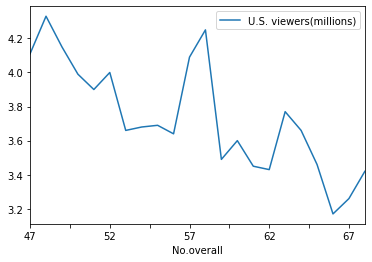

In [40]:
episode_list.iloc[:,5:7].plot(); 

But what if we want to get really fancy? PyPlot has some really excellent features. We can append this stuff to the default figure 1.

In [41]:
# plt.plot?

In [42]:
print(type(episode_list.iloc[:,1]))
print(type(episode_list.iloc[:,1].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [43]:
#plt.xticks?

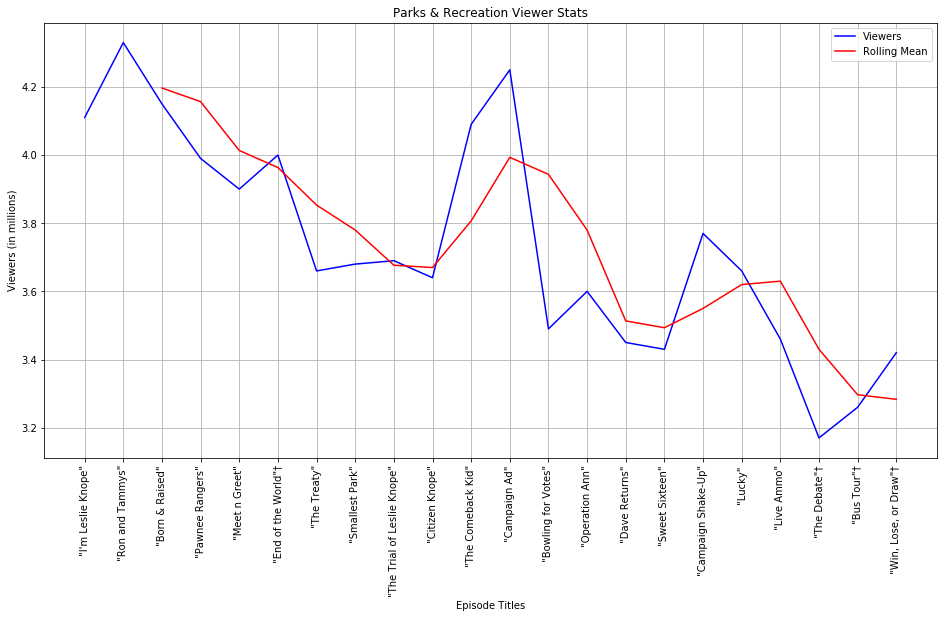

In [44]:
episode_titles = episode_list.iloc[:,1].values
episode_viewers = episode_list.iloc[:,5].values

index = np.arange(len(episode_list))

plt.figure(num=None, figsize=(16, 8), facecolor='w', edgecolor='k')
plt.xlabel('Episode Titles')
plt.title('Parks & Recreation Viewer Stats')
plt.xticks(index,episode_titles,rotation=90)
plt.ylabel('Viewers (in millions)')
plt.plot(index, episode_viewers,'b',label='Viewers')
plt.plot(pd.Series(episode_viewers).rolling(window=3).mean(),'r',label='Rolling Mean')
plt.grid()

plt.legend()
plt.show()

## Additional In Class Info:

This is a way to concatenate all of the seasons together into one big DataFrame:

In [45]:
full_episodes = pd.DataFrame()
for season in range(1,8):
    episodes = pd.read_html(f'https://en.wikipedia.org/wiki/Parks_and_Recreation_%28season_{season}%29',header=0)
    season = episodes[1]
    episode_desc = season[1::2].iloc[:,0].reset_index().drop('index',axis=1)
#     this is the line we were missing:
    episode_desc = episode_desc.rename(columns = {'No.overall':'Description'})
    episode_data = season[0::2].reset_index().drop('index',axis=1)
    episode_data = episode_data.drop('Unnamed: 7',axis=1)
    episode_list = pd.concat([episode_data,episode_desc],axis=1)
    episode_list = episode_list.set_index('No.overall')
    full_episodes = pd.concat([full_episodes,episode_list],axis=0)

In [46]:
full_episodes.head()

,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Description
No.overall,,,,,,,
1,1,"""Pilot""",Greg Daniels,Greg Daniels & Michael Schur,"April 9, 2009",6.77[4],Ann Perkins (Rashida Jones) attends a town mee...
2,2,"""Canvassing""",Seth Gordon,Rachel Axler,"April 16, 2009",5.92[5],Leslie and the pit subcommittee canvas neighbo...
3,3,"""The Reporter""",Jeffrey Blitz,Dan Goor,"April 23, 2009",5.24[6],Leslie invites a local reporter (Alison Becker...
4,4,"""Boys' Club""",Michael McCullers,Alan Yang,"April 30, 2009",5.29[7],"As Andy cleans up the house to surprise Ann, L..."
5,5,"""The Banquet""",Beth McCarthy-Miller,Tucker Cawley,"May 7, 2009",4.64[8],During a banquet honoring her mother's public ...


In [49]:
full_episodes.tail()

,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Description
No.overall,,,,,,,
120,8,"""Ms. Ludgate-Dwyer Goes to Washington""",Morgan Sackett,Dave King,"February 10, 2015",3.06[22],Leslie takes April to Washington D.C. on a DoI...
121,9,"""Pie-Mary""†",Greg Daniels,Emma Fletcher & Rachna Fruchbom,"February 10, 2015",2.47[22],"Leslie becomes the center of attention when, a..."
122,10,"""The Johnny Karate Super Awesome Musical Explo...",Dean Holland,Matt Hubbard,"February 17, 2015",2.94[23],Andy hosts the final episode of his children's...
123,11,"""Two Funerals""",Craig Zisk,Jen Statsky,"February 17, 2015",2.47[23],Leslie confirms that she is receiving the job ...
124125,1213,"""One Last Ride""†‡",Michael Schur,Michael Schur & Amy Poehler,"February 24, 2015",4.15[25],"In the last day in Pawnee, Leslie rallies the ..."


This is a simpler way to get the episode description into the data row directly above it: (Thanks Dom!)

In [47]:
full_episodes = pd.DataFrame()
for season in range(1,8):
    episodes = pd.read_html(f'https://en.wikipedia.org/wiki/Parks_and_Recreation_%28season_{season}%29')
    season = episodes[1]
    season.fillna(method='bfill',inplace=True)
    season_clean = season.iloc[0::2].copy()
    season_clean = season_clean.rename(columns = {'Unnamed: 7':'Description'})
    season_clean.set_index('No.overall',inplace=True)
    full_episodes = pd.concat([full_episodes,season_clean],axis=0)

In [50]:
full_episodes.head()

,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Description
No.overall,,,,,,,
1,1,"""Pilot""",Greg Daniels,Greg Daniels & Michael Schur,"April 9, 2009",6.77[4],Ann Perkins (Rashida Jones) attends a town mee...
2,2,"""Canvassing""",Seth Gordon,Rachel Axler,"April 16, 2009",5.92[5],Leslie and the pit subcommittee canvas neighbo...
3,3,"""The Reporter""",Jeffrey Blitz,Dan Goor,"April 23, 2009",5.24[6],Leslie invites a local reporter (Alison Becker...
4,4,"""Boys' Club""",Michael McCullers,Alan Yang,"April 30, 2009",5.29[7],"As Andy cleans up the house to surprise Ann, L..."
5,5,"""The Banquet""",Beth McCarthy-Miller,Tucker Cawley,"May 7, 2009",4.64[8],During a banquet honoring her mother's public ...


In [51]:
full_episodes.tail()

,No. inseason,Title,Directed by,Written by,Original air date,U.S. viewers(millions),Description
No.overall,,,,,,,
120,8,"""Ms. Ludgate-Dwyer Goes to Washington""",Morgan Sackett,Dave King,"February 10, 2015",3.06[22],Leslie takes April to Washington D.C. on a DoI...
121,9,"""Pie-Mary""†",Greg Daniels,Emma Fletcher & Rachna Fruchbom,"February 10, 2015",2.47[22],"Leslie becomes the center of attention when, a..."
122,10,"""The Johnny Karate Super Awesome Musical Explo...",Dean Holland,Matt Hubbard,"February 17, 2015",2.94[23],Andy hosts the final episode of his children's...
123,11,"""Two Funerals""",Craig Zisk,Jen Statsky,"February 17, 2015",2.47[23],Leslie confirms that she is receiving the job ...
124125,1213,"""One Last Ride""†‡",Michael Schur,Michael Schur & Amy Poehler,"February 24, 2015",4.15[25],"In the last day in Pawnee, Leslie rallies the ..."
